# CREDIT CARD FRAUD DETECTION USING ANN

link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transaction..

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# 1. Importing required Packages and Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [60]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# 2. Importing and enquiring Dataset

In [4]:
df = pd.read_csv("creditcard.csv")

In [5]:
df_copy = df.copy()

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 3. EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.duplicated().sum()

1081

In [10]:
df.drop_duplicates(inplace  =True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [13]:
df.corr()['Class']

Time     -0.012359
V1       -0.094486
V2        0.084624
V3       -0.182322
V4        0.129326
V5       -0.087812
V6       -0.043915
V7       -0.172347
V8        0.033068
V9       -0.094021
V10      -0.206971
V11       0.149067
V12      -0.250711
V13      -0.003897
V14      -0.293375
V15      -0.003300
V16      -0.187186
V17      -0.313498
V18      -0.105340
V19       0.033631
V20       0.021486
V21       0.026357
V22       0.004887
V23      -0.006333
V24      -0.007210
V25       0.003202
V26       0.004265
V27       0.021892
V28       0.009682
Amount    0.005777
Class     1.000000
Name: Class, dtype: float64

# 4. Visualizations

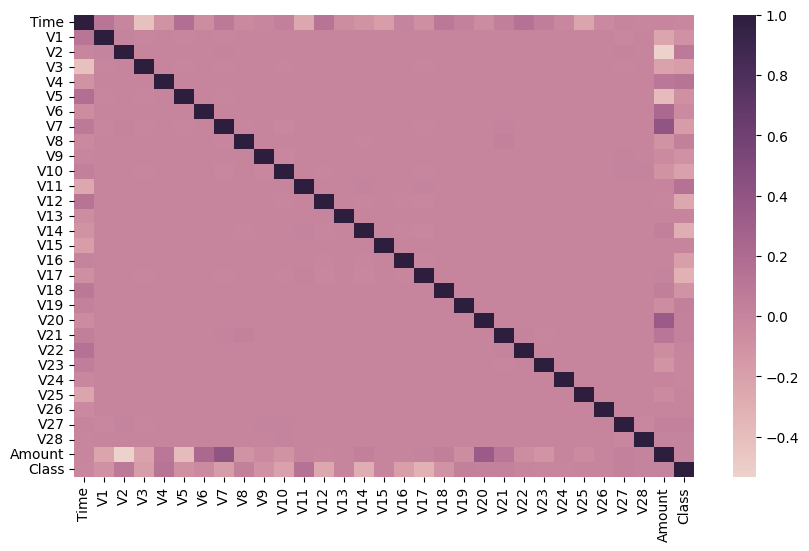

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap = sns.cubehelix_palette(as_cmap=True))
plt.show()

<Axes: xlabel='Amount', ylabel='Density'>

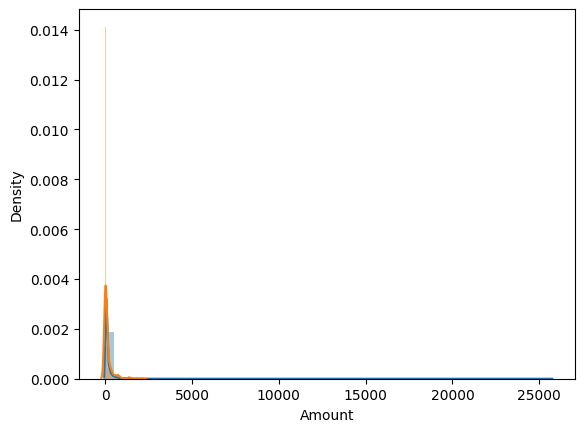

In [15]:
sns.distplot(df['Amount'][df['Class']==0])
sns.distplot(df['Amount'][df['Class']==1])

<Axes: xlabel='Class', ylabel='Amount'>

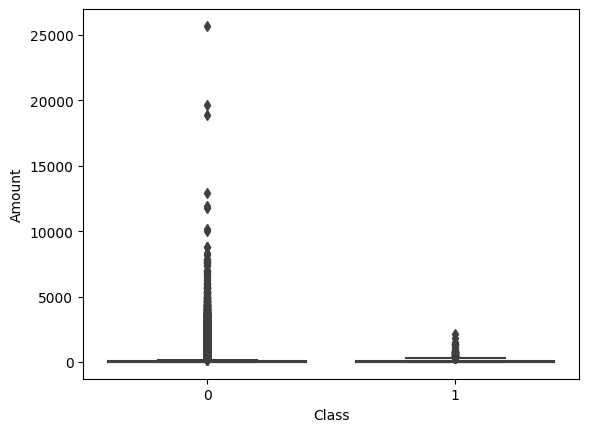

In [16]:
sns.boxplot(x = df['Class'], y = df['Amount'])

<Axes: ylabel='count'>

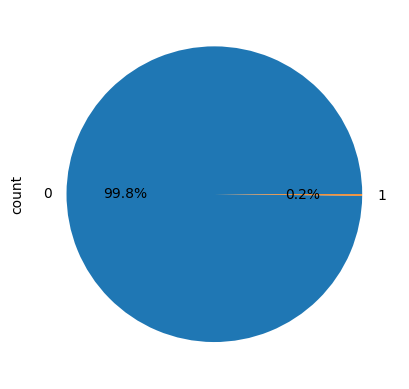

In [19]:
df['Class'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')

In [20]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [18]:
x = df.drop(columns=['Class'])
y = df['Class']

In [21]:
x.shape

(283726, 30)

In [22]:
y.shape

(283726,)

In [23]:
y.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

## Handling Imbalanced Dataset

In [24]:
sm = SMOTE()

In [25]:
x_sm, y_sm = sm.fit_resample(x, y)

In [26]:
x_sm.shape

(566506, 30)

In [27]:
y_sm.shape

(566506,)

In [28]:
y_sm.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

<Axes: ylabel='count'>

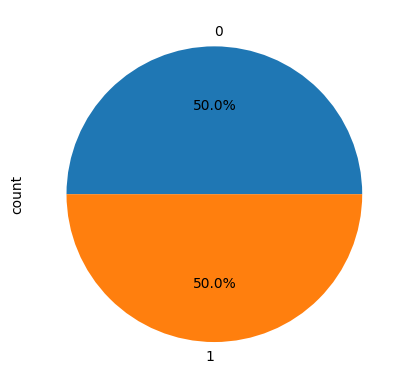

In [49]:
y_sm.value_counts().plot(kind = 'pie', autopct='%1.1f%%')

# 5. ANN Modelling

In [29]:
scaler = StandardScaler()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.25, random_state=1)

In [31]:
X_train_scaled = scaler.fit_transform(X_train)

In [32]:
X_test_scaled = scaler.transform(X_test)

In [33]:
X_train_scaled

array([[-0.76714462, -0.567457  ,  0.74115613, ...,  0.78840322,
         0.2084792 ,  0.607467  ],
       [-0.06714901,  0.24230772, -0.68449261, ..., -0.2414174 ,
        -0.10746557, -0.42573938],
       [ 0.12891491, -1.62980014,  1.45783583, ..., -1.0210426 ,
        -0.42767999, -0.31999379],
       ...,
       [ 0.77728601,  0.36814638,  0.06250522, ...,  0.1858602 ,
         0.67715478, -0.32234064],
       [-0.4094949 ,  0.17523249, -0.76279131, ..., -0.03966399,
        -0.10719297,  1.36301419],
       [-0.18317769,  0.64859759, -0.53604842, ..., -0.09824372,
        -0.10004462, -0.05002029]])

In [34]:
X_test_scaled

array([[ 1.54131243,  0.48296476, -0.11258927, ..., -0.09012943,
        -0.07644865, -0.38058706],
       [ 0.12720938, -0.55224939,  1.27664944, ...,  0.56338276,
         1.42461621, -0.29612546],
       [ 0.97729534,  0.78815131, -0.50122609, ..., -0.11993003,
        -0.05100633,  0.02901753],
       ...,
       [ 0.30389192,  0.21690561,  0.14022088, ...,  0.30883212,
        -0.4156181 , -0.36202195],
       [-1.28646677, -1.02895566,  1.19540389, ...,  0.82281543,
         0.58660051, -0.20796638],
       [ 1.5172788 ,  0.47212761, -0.21120943, ...,  0.13820332,
         0.0943609 , -0.425784  ]])

In [35]:
model = Sequential()

In [70]:
model.add(Dense(90, activation='relu', input_dim = 30 ))
model.add(Dense(45, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid' ))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

In [45]:
history = model.fit(X_train_scaled, y_train, validation_split=0.33, epochs=50, verbose=True, batch_size= 50)

Epoch 1/50
5694/5694 [==============================] - 23s 4ms/step - loss: 3.7536e-04 - accuracy: 0.9999 - val_loss: 0.0054 - val_accuracy: 0.9997
Epoch 2/50
5694/5694 [==============================] - 22s 4ms/step - loss: 5.4687e-04 - accuracy: 0.9999 - val_loss: 0.0023 - val_accuracy: 0.9998
Epoch 3/50
5694/5694 [==============================] - 22s 4ms/step - loss: 3.9805e-04 - accuracy: 0.9999 - val_loss: 0.0035 - val_accuracy: 0.9996
Epoch 4/50
5694/5694 [==============================] - 22s 4ms/step - loss: 2.3443e-04 - accuracy: 0.9999 - val_loss: 0.0058 - val_accuracy: 0.9996
Epoch 5/50
5694/5694 [==============================] - 22s 4ms/step - loss: 3.0760e-04 - accuracy: 0.9999 - val_loss: 0.0045 - val_accuracy: 0.9997
Epoch 6/50
5694/5694 [==============================] - 22s 4ms/step - loss: 2.3282e-04 - accuracy: 0.9999 - val_loss: 0.0049 - val_accuracy: 0.9997
Epoch 7/50
5694/5694 [==============================] - 22s 4ms/step - loss: 2.1263e-04 - accuracy: 0.9999

In [46]:
history.params

{'verbose': True, 'epochs': 50, 'steps': 5694}

In [47]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

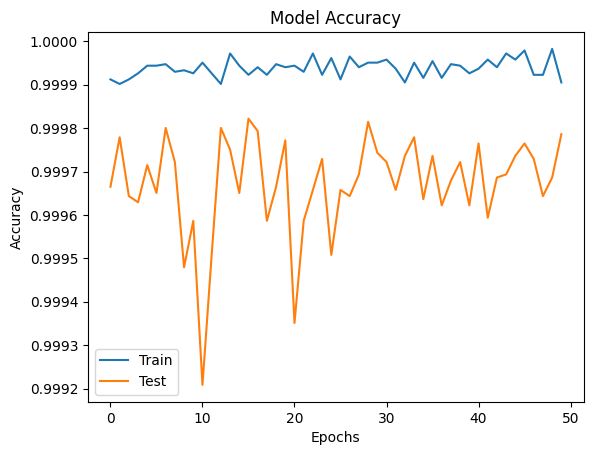

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

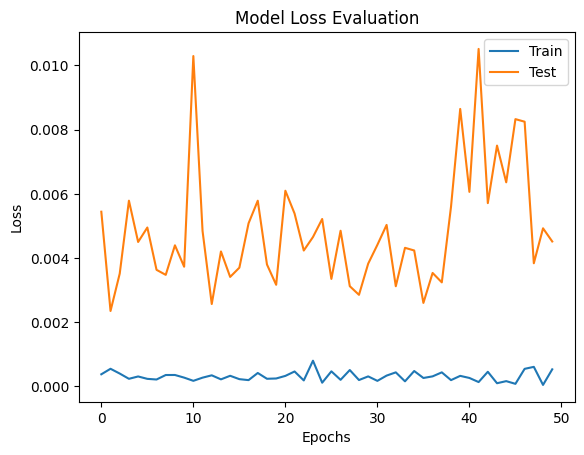

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Evaluation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

# 6. Hyperparameter tuning using Kerastuner

In [52]:
pip install keras-tuner --upgrade

  Using cached keras_tuner-1.3.5-py3-none-any.whl (176 kB)
  Using cached kt_legacy-1.0.5-py3-none-any.whl (9.6 kB)
Note: you may need to restart the kernel to use updated packages.


In [59]:
import keras_tuner as kt
from keras.callbacks import EarlyStopping

In [56]:
def build_model(hp):
    model = keras.Sequential()
    model.add(Dense(90, activation='relu', input_dim = 30 ))
    model.add(Dense(45, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    opt = hp.Choice('optmizer', values = ['adam', 'sgd', 'rmsprop', 'adadelta'])
    model.compile(optimizer=opt, loss = 'binary_crossentropy', metrics=['accuracy'])
    return model

In [61]:
call = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=15,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [65]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=10, directory = 'Directory', project_name = 'Task2')

In [66]:
tuner.search(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test))

Trial 4 Complete [00h 04m 49s]
val_accuracy: 0.9995763301849365

Best val_accuracy So Far: 0.9997034668922424
Total elapsed time: 00h 21m 38s
INFO:tensorflow:Oracle triggered exit


In [69]:
tuner.get_best_hyperparameters()[0].values

{'optmizer': 'adam'}

In [71]:
final = model.fit(X_train_scaled, y_train, validation_split=0.33, epochs= 200, verbose=True, batch_size= 50, callbacks=call)

Epoch 1/200
5694/5694 [==============================] - 17s 3ms/step - loss: 0.0087 - accuracy: 0.9998 - val_loss: 0.0041 - val_accuracy: 0.9996
Epoch 2/200
5694/5694 [==============================] - 15s 3ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.0042 - val_accuracy: 0.9995
Epoch 3/200
5694/5694 [==============================] - 15s 3ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.0039 - val_accuracy: 0.9996
Epoch 4/200
5694/5694 [==============================] - 15s 3ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0037 - val_accuracy: 0.9996
Epoch 5/200
5694/5694 [==============================] - 15s 3ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0036 - val_accuracy: 0.9995
Epoch 6/200
5694/5694 [==============================] - 15s 3ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0036 - val_accuracy: 0.9996
Epoch 7/200
5694/5694 [==============================] - 16s 3ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0035 -

In [72]:
final.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

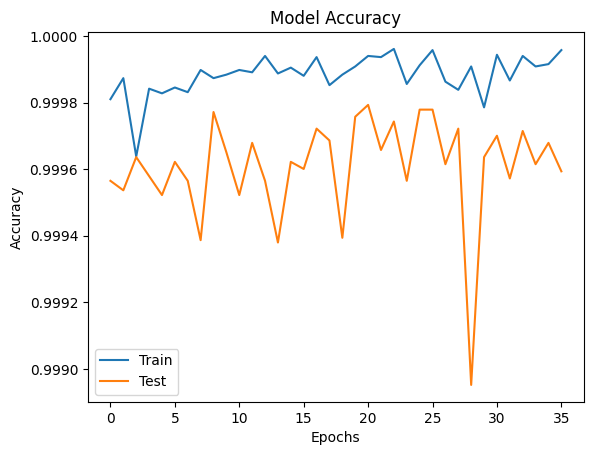

In [73]:
plt.plot(final.history['accuracy'])
plt.plot(final.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

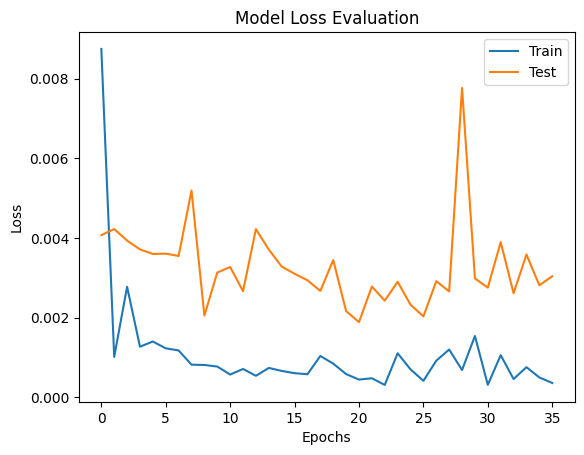

In [75]:
plt.plot(final.history['loss'])
plt.plot(final.history['val_loss'])
plt.title('Model Loss Evaluation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

# Thanks 